In [17]:
from sklearn.feature_selection import RFE

from sklearn.svm import SVR

from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

X, y = data.data, data.target

estimator = SVR(kernel="linear")

selector = RFE(estimator, n_features_to_select=5, step=1)

selector.fit(X, y)

print(selector.support_)

print(selector.ranking_)

In [3]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE

breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

rfe_method = RFE(
    RandomForestClassifier(n_estimators=10, random_state=10),
    n_features_to_select=8,
    step=2,
)

rfe_method.fit(X_train, y_train)

X_train.columns[(rfe_method.get_support())]

X_train_selected = rfe_method.transform(X_train)
X_test_selected = rfe_method.transform(X_test)

In [ ]:
!pip install feature-engine

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from feature_engine.selection import RecursiveFeatureElimination

X, y = fetch_california_housing(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = GradientBoostingRegressor(
    n_estimators=5,
    random_state=10,
)

RFE_model = RecursiveFeatureElimination(
    estimator = model, # the ML model
    scoring = 'r2', 
    threshold = 0.001, 
    cv=2,
)
RFE_model.fit(X_train, y_train)

RecursiveFeatureElimination(cv=2,
                            estimator=GradientBoostingRegressor(n_estimators=5,
                                                                random_state=10),
                            scoring='r2', threshold=0.001)

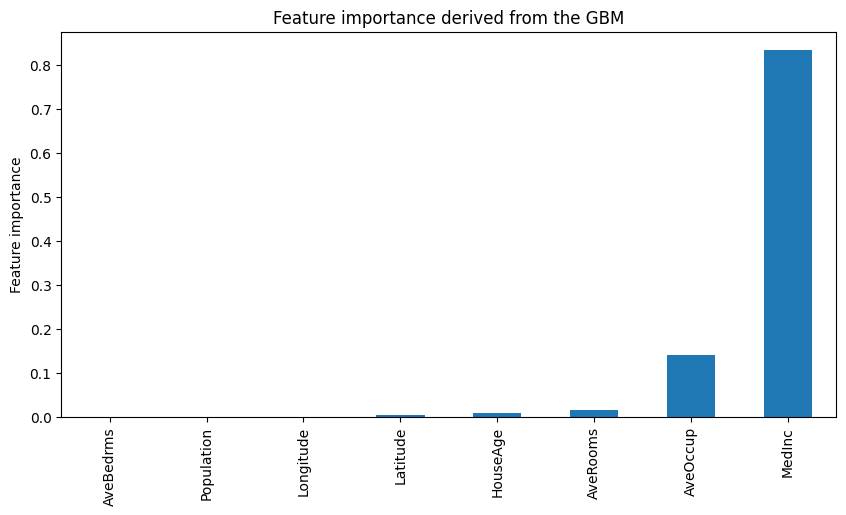

In [3]:
RFE_model.feature_importances_.plot.bar(figsize=(10, 5))
plt.ylabel('Feature importance')
plt.title('Feature importance derived from the GBM')
plt.show()

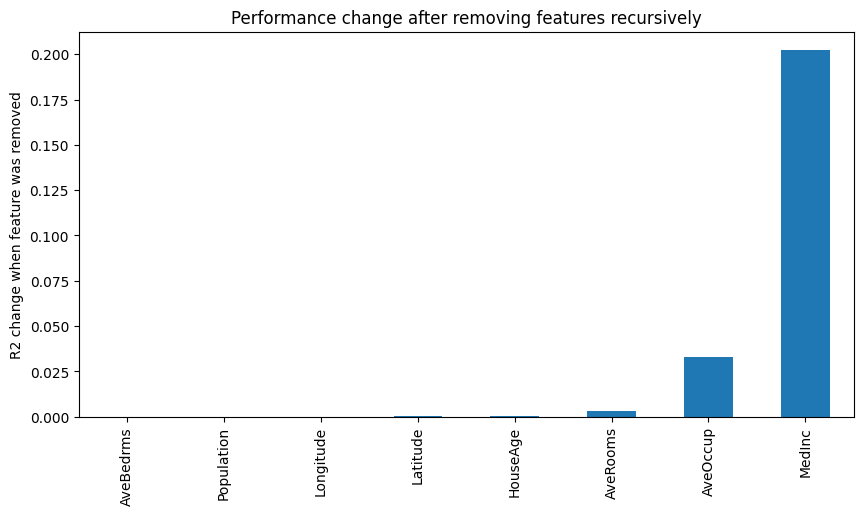

In [4]:
pd.Series(RFE_model.performance_drifts_).plot.bar(figsize=(10, 5))
plt.title('Performance change after removing features recursively')
plt.ylabel('R2 change when feature was removed')
plt.show()

In [5]:
RFE_model.features_to_drop_

['HouseAge', 'AveBedrms', 'Population', 'Latitude', 'Longitude']

In [ ]:
X_train_t = RFE_model.transform(X_train)
X_test_t = RFE_model.transform(X_test)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from feature_engine.selection import RecursiveFeatureElimination

X, y = fetch_california_housing(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = GradientBoostingRegressor(
    n_estimators=5,
    random_state=10,
)

RFE_model = RecursiveFeatureElimination(
    estimator = model, # the ML model
    scoring = 'r2', 
    threshold = 0.001, 
    cv=2,
)

RFE_model.fit(X_train, y_train)

RecursiveFeatureElimination(cv=2,
                            estimator=GradientBoostingRegressor(n_estimators=5,
                                                                random_state=10),
                            scoring='r2', threshold=0.001)

In [7]:
RFE_model.initial_model_performance_

0.3639885983830904

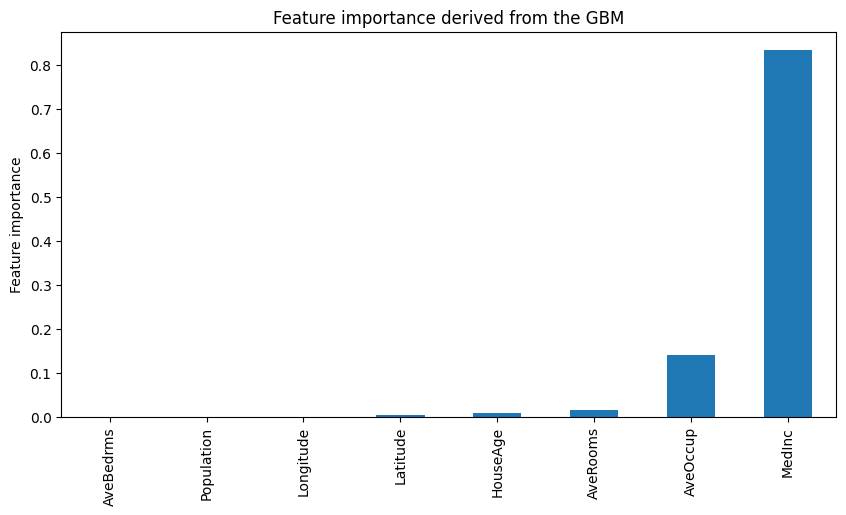

In [9]:
RFE_model.feature_importances_.plot.bar(figsize=(10, 5))
plt.ylabel('Feature importance')
plt.title('Feature importance derived from the GBM')
plt.show()

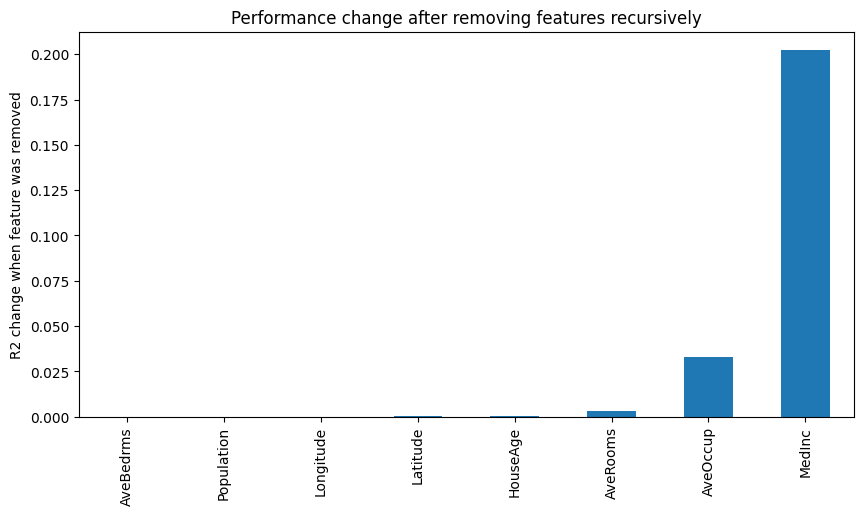

In [10]:
pd.Series(RFE_model.performance_drifts_).plot.bar(figsize=(10, 5))
plt.title('Performance change after removing features recursively')
plt.ylabel('R2 change when feature was removed')
plt.show()

In [11]:
RFE_model.features_to_drop_ 

['HouseAge', 'AveBedrms', 'Population', 'Latitude', 'Longitude']

In [12]:
X_train_t = RFE_model.transform(X_train)
X_test_t = RFE_model.transform(X_test)

In [16]:
model.fit(X_train_t, y_train)
predictions = model.predict(X_test_t)

In [18]:
print(predictions)
print(y_test)

[2.02165536 2.28579071 2.02165536 ... 2.38922394 2.22862857 2.0748306 ]
14740    1.369
10101    2.413
20566    2.007
2670     0.725
15709    4.600
         ...  
13132    1.212
8228     1.375
3948     1.609
8522     2.273
16798    2.656
Name: MedHouseVal, Length: 5160, dtype: float64
